#### Copyright 2020 Catalit LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Documentation links:

- [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb)
- [Numpy](https://docs.scipy.org/doc/)
- [Pandas](https://pandas.pydata.org/docs/getting_started/index.html)
- [Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Matplotlib](https://matplotlib.org/)
- [Matplotlib Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
- [Seaborn](https://seaborn.pydata.org/)
- [Scikit-learn](https://scikit-learn.org/stable/user_guide.html)
- [Scikit-learn Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)
- [Scikit-learn Flow Chart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

# Regression with Scikit Learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = "https://raw.githubusercontent.com/zerotodeeplearning/ztdl-masterclasses/master/data/"

## Regression

In [3]:
df = pd.read_csv(url + 'weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


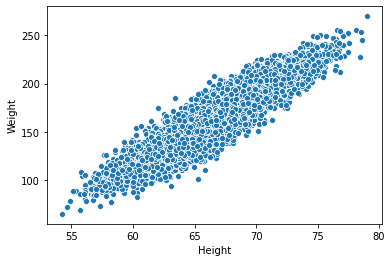

In [5]:
sns.scatterplot(data=df,
                x='Height',
                y='Weight');

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
X = df[['Height']].values
y = df['Weight'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
model.score(X_train, y_train)

0.8544074009765417

In [12]:
model.score(X_test, y_test)

0.8581952493935256

In [13]:
y_pred_test = model.predict(X_test)

## Plot the line of best fit

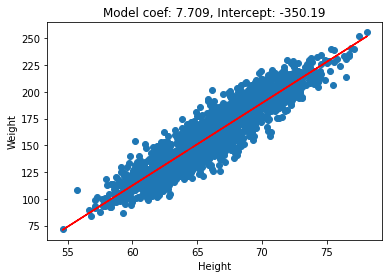

In [14]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_test, color='red')
plt.title("Model coef: {:0.3f}, Intercept: {:0.2f}".format(model.coef_[0], model.intercept_))
plt.xlabel("Height")
plt.ylabel("Weight");

### Compare true and predicted values ($y$ vs $\hat{y}$)

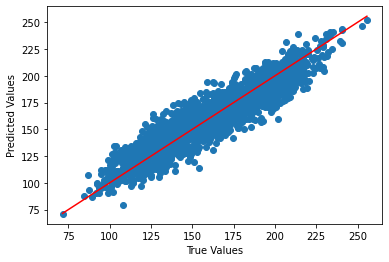

In [15]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

m = y_test.min()
M = y_test.max()

plt.plot((m, M), (m, M), color='red');

### Exercise 1: multiple features

More features: `sqft`, `bdrms`, `age`, `price`

- load the dataset `housing-data.csv`
- visualize the data using `sns.pairplot`
- add more columns in the feature definition `X = ...`
- train and evaluate a Linear regression model
- compare predictions with actual values
- is your score good?
- change the `random_state` in the train/test split function. Does the score stay stable?

In [16]:
data= pd.read_csv(url+'housing-data.csv')

In [17]:
data.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sqft    47 non-null     int64
 1   bdrms   47 non-null     int64
 2   age     47 non-null     int64
 3   price   47 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


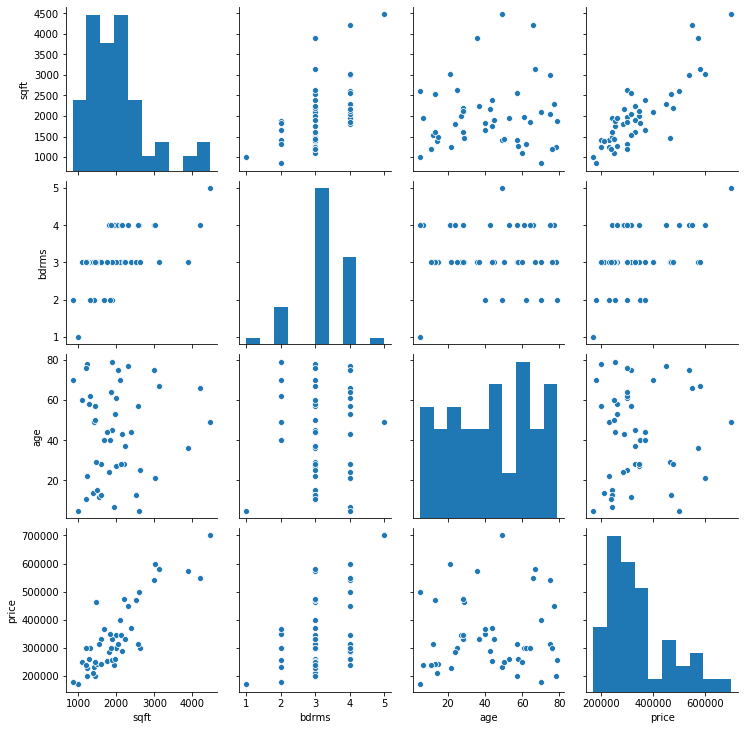

In [20]:
sns.pairplot(data=data)

In [26]:
X = data[['sqft','bdrms','age']].values
y = data['price'].values

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
model.score(X_train, y_train)

0.7411959910367354

In [32]:

model.score(X_test, y_test)

0.6497683467924655

In [33]:
y_pred_test = model.predict(X_test)


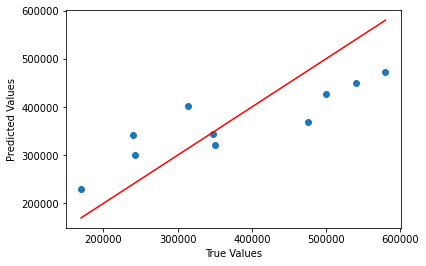

In [34]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

m = y_test.min()
M = y_test.max()

plt.plot((m, M), (m, M), color='red')

### Exercise 2

- Encapsulate the split/train/evaluate steps into a single function with signature:

```python
def train_eval(random_state=0):
  # YOUR CODE HERE

  return train_score, test_score
```
- Compare the performance of the model for several random states

- Bonus points if you plot a histogram of train and test scores

In [35]:
from sklearn.metrics import r2_score

In [36]:

def train_eval(random_state=0):
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state)
  
  model = LinearRegression()
  
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  train_score = r2_score(y_train, y_pred_train)
  test_score = r2_score(y_test, y_pred_test)
  
  return train_score, test_score

train_eval()

(0.7411959910367354, 0.6497683467924655)

In [37]:
random_states = range(500)
scores = [train_eval(rs) for rs in random_states]

In [38]:

dfscores = pd.DataFrame(scores,
                        index=random_states,
                        columns=['train_score', 'test_score'])

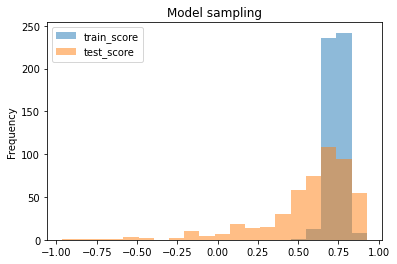

In [39]:
dfscores.plot.hist(alpha=0.5, bins=20, title='Model sampling');

### Exercise 3:

Let's see how easy it is to test different models on a larger dataset.

Here we load the California Housing dataset from Scikit Learn. Your goal is to define a function that:
- trains a model
- plots `y_pred` vs `y_true`

You can skip doing train/test split for this exercise.

Then compare the performance of the models given below:
- `sklearn.linear_model.LinearRegression`
- `sklearn.ensembleGradient.BoostingRegressor`
- `sklearn.ensembleRandom.ForestRegressor`
- `sklearn.linear_model.Ridge`
- `sklearn.linear_model.Lasso`

Function signature:

```python
def train_eval_plot(model):
  # YOUR CODE HERE

```

In [43]:
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso

In [41]:
dataset = fetch_california_housing()
y = dataset.target

Xdf = pd.DataFrame(dataset.data, columns=dataset.feature_names)
X = Xdf.values

Xdf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [42]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [44]:

def train_eval_plot(model):
  model.fit(X, y)
  y_pred = model.predict(X)

  plt.figure()
  plt.scatter(y, y_pred)
  plt.xlabel("True Values")
  plt.ylabel("Predicted Values")

  m = y.min()
  M = y.max()

  plt.plot((m, M), (m, M), color='red')
  plt.title(model.__class__.__name__);

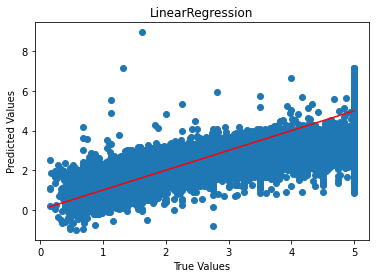

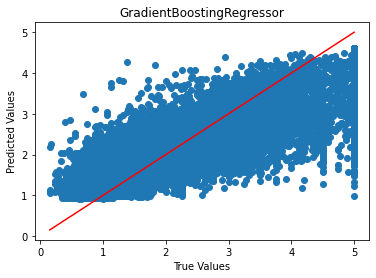

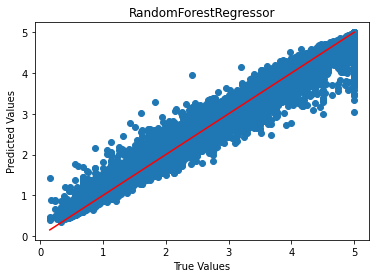

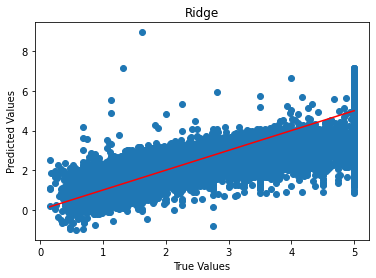

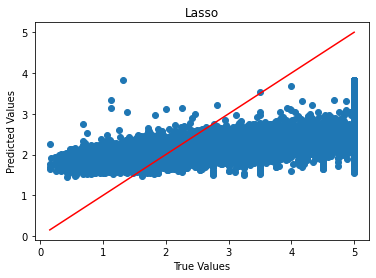

In [45]:

models = [LinearRegression(),
          GradientBoostingRegressor(random_state=0, n_estimators=25),
          RandomForestRegressor(random_state=0, n_estimators=25),
          Ridge(),
          Lasso()]

for model in models:
  train_eval_plot(model)